In [1]:
import os
import random

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from cutmix import cutmix

In [3]:
# 乱数シード初期化
np.random.seed(1)

In [4]:
# 画像読み込み設定
image_directory = os.path.join(os.getcwd(), 'image')
image_size = (426, 640)
batch_size = 6

In [5]:
# データ拡張実行
image_generator = ImageDataGenerator()
generator = image_generator.flow_from_directory(batch_size=batch_size, directory=image_directory, target_size=image_size, class_mode='categorical')

batches = next(generator)
x_train= batches[0].astype(np.uint8)
y_train = batches[1].astype(np.uint8)

# CutMix実行
x, y = cutmix(x_train, y_train, beta=0.5)

Found 6 images belonging to 2 classes.


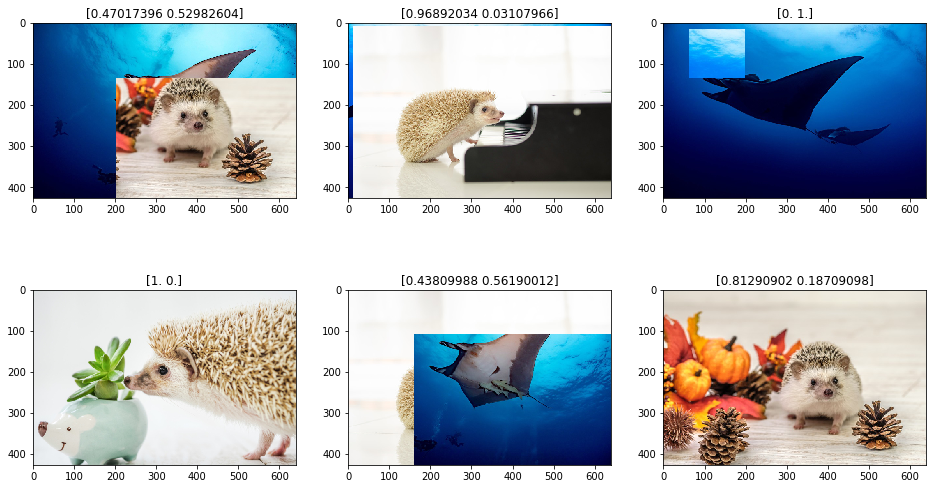

In [6]:
# 実行結果描画
x = np.array(x).astype(np.uint8)  # 描画用に符号なし整数化

plt.figure(figsize=(16, 9))

column = 3
row = 2
for i in range(column * row):
    plt.subplot(row, column, i+1)
    plt.title(str(y[i]))
    plt.imshow(x[i])
plt.show()

In [7]:
# MixUp実行(デバッグモード)
x, y, x1, y1, x2, y2, l_param = cutmix(x_train, y_train, beta=1.0, is_debug=True)
print(l_param)

[0.1352079  0.09621629 0.18546073 0.53045112 0.94407498 0.15011869]


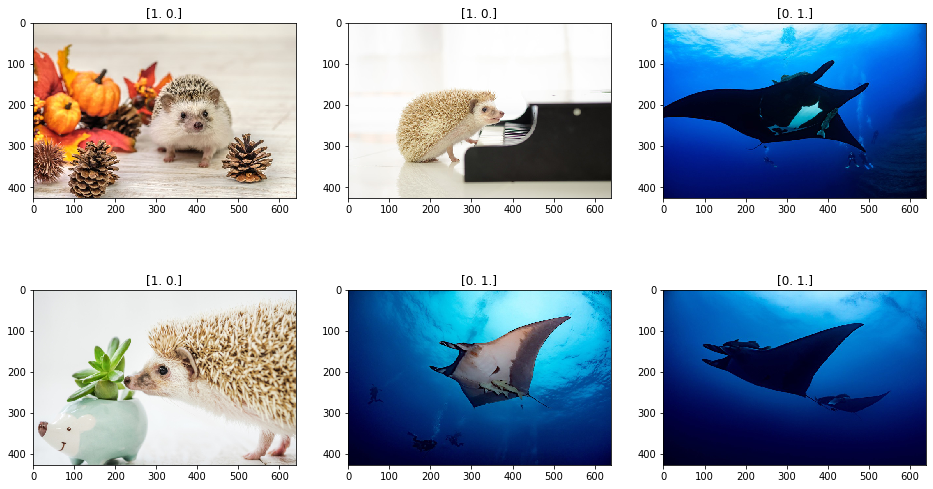

In [8]:
# 実行結果描画(CutMix前画像①)
x = np.array(x).astype(np.uint8)  # 描画用に符号なし整数化

plt.figure(figsize=(16, 9))

column = 3
row = 2
for i in range(column * row):
    plt.subplot(row, column, i+1)
    plt.title(str(y1[i]))
    plt.imshow(x1[i])
plt.show()

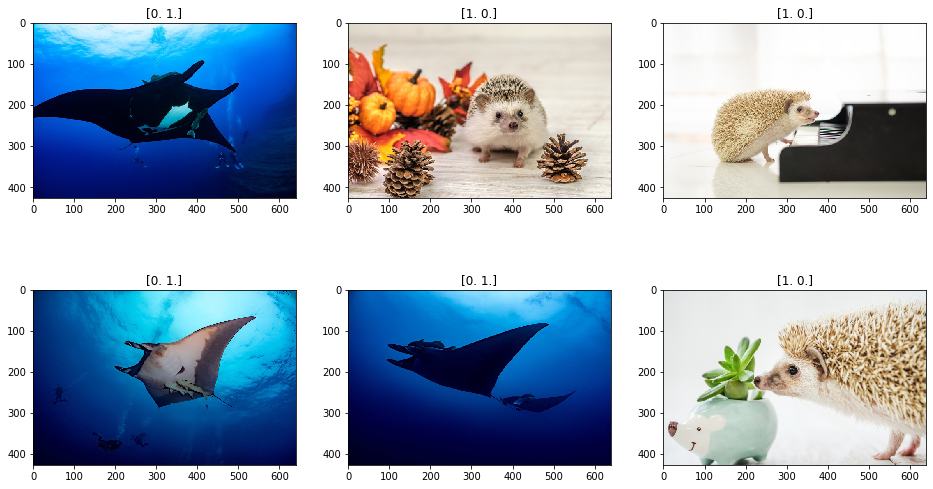

In [9]:
# 実行結果描画(CutMix前画像②)
x = np.array(x).astype(np.uint8)  # 描画用に符号なし整数化

plt.figure(figsize=(16, 9))

column = 3
row = 2
for i in range(column * row):
    plt.subplot(row, column, i+1)
    plt.title(str(y2[i]))
    plt.imshow(x2[i])
plt.show()

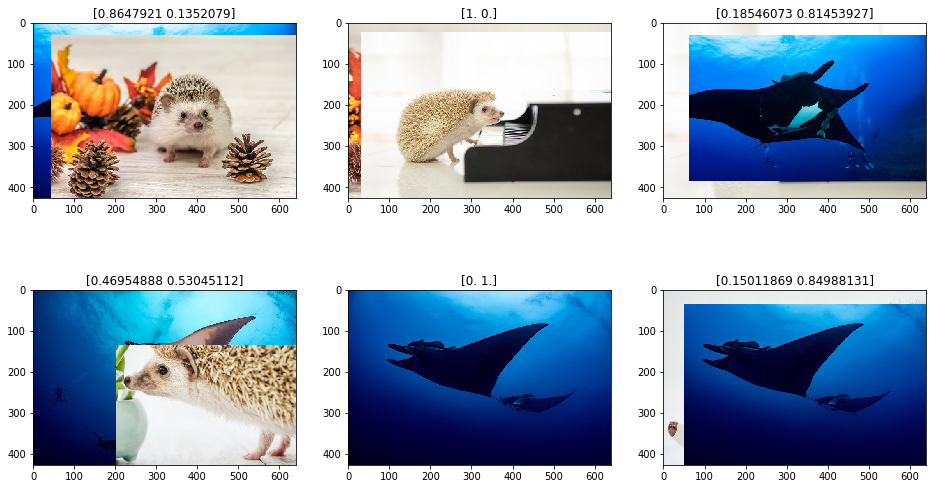

In [10]:
# 実行結果描画(CutMix結果)
x = np.array(x).astype(np.uint8)  # 描画用に符号なし整数化

plt.figure(figsize=(16, 9))

column = 3
row = 2
for i in range(column * row):
    plt.subplot(row, column, i+1)
    plt.title(str(y[i]))
    plt.imshow(x[i])
plt.show()